In [1]:
from fastai.basics import *

time = torch.arange(0, 20).float()
time

tensor([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
        14., 15., 16., 17., 18., 19.])

In [2]:
speed = torch.randn(20)*3 + 0.75*(time-9.5)**2 + 1
speed

tensor([67.1986, 57.4938, 46.5890, 35.1971, 33.9036, 15.5912,  5.1981,  3.8584,
        -5.4161,  3.1305, -2.0527,  2.4790,  6.2648, 16.0993, 18.9554, 18.4507,
        31.6865, 45.3668, 57.0809, 69.5856])

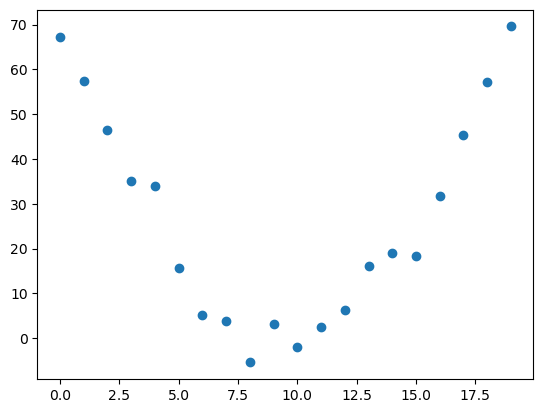

In [3]:
plt.scatter(time, speed)

In [4]:
def f(t, params):
    a, b, c = params
    return a*(t**2) + (b*t) + c

In [5]:
def mse(preds, targets):
    return ((preds - targets)**2).mean()

## Initialize the parameters

In [6]:
params = torch.randn(3).requires_grad_()
params

tensor([-0.6854, -1.0949, -0.8980], requires_grad=True)

## Calculate the predictions

In [7]:
preds = f(time, params)
preds

tensor([  -0.8980,   -2.6783,   -5.8293,  -10.3511,  -16.2436,  -23.5069,
         -32.1409,  -42.1457,  -53.5212,  -66.2675,  -80.3845,  -95.8722,
        -112.7307, -130.9600, -150.5600, -171.5307, -193.8722, -217.5844,
        -242.6674, -269.1211], grad_fn=<AddBackward0>)

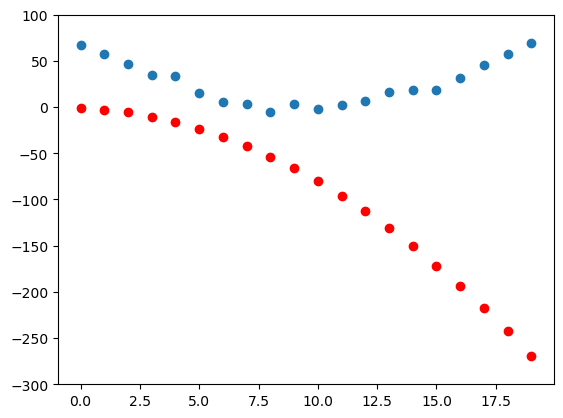

In [9]:
def show_preds(preds, ax=None):
    if ax is None:
        ax=plt.subplots()[1]
    ax.scatter(time, speed)
    ax.scatter(time, to_np(preds), color='red')
    ax.set_ylim(-300, 100)

show_preds(preds)

## Calculate the loss

In [13]:
loss = mse(preds, speed)
loss

tensor(23438.9609, grad_fn=<MeanBackward0>)

## Calculate the gradients

In [14]:
loss.backward()
params.grad

tensor([-50557.8320,  -3259.1060,   -244.5526])

In [15]:
params.grad * 1e-5

tensor([-0.5056, -0.0326, -0.0024])

In [16]:
params

tensor([-0.6854, -1.0949, -0.8980], requires_grad=True)

## Step the weights

In [17]:
lr = 1e-5
params.data -= lr * params.grad.data
params.grad = None

In [18]:
preds = f(time, params)
mse(preds, speed)

tensor(5022.2612, grad_fn=<MeanBackward0>)

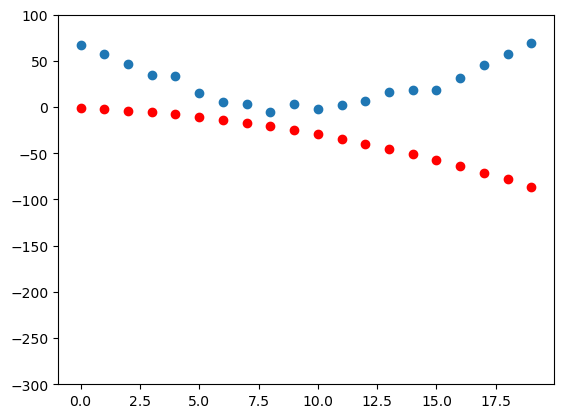

In [19]:
show_preds(preds)

In [20]:
def apply_step(params, prn=True):
    preds = f(time, params)
    loss = mse(preds, speed)
    loss.backward()
    params.data -= lr * params.grad.data
    params.grad = None
    if prn:
        print(loss.item())
    return preds

## Repeat the process

In [21]:
for i in range(10):
    apply_step(params)

5022.26123046875
1537.251708984375
877.7756958007812
752.9769897460938
729.35546875
724.8798828125
724.0271606445312
723.8600463867188
723.8226318359375
723.8097534179688
